https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset?select=Ratings.csv

## Libraries

In [2]:
import zipfile,os
from google.colab import files
from google.colab import drive
import pandas as pd

## Data Loading


In [3]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Proses ekstraksi pada file zip
local_zip = '/content/gdrive/MyDrive/dataset/recommendation_dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
books = pd.read_csv("/content/Books.csv")
rating = pd.read_csv("/content/Ratings.csv")
users = pd.read_csv("/content/Users.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
print(len(rating))
print(len(users))
print(len(books))

1149780
278858
271360


In [7]:
rating.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [8]:
books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


## Exploratory Data Analysis

### 1. Book-Title

In [9]:
print('Jumlah Judul Buku : ', len(books["Book-Title"].unique()))
print('Jumlah Nomor ISBN Buku : ', len(books["ISBN"].unique()))

Jumlah Judul Buku :  242135
Jumlah Nomor ISBN Buku :  271360


Kita menemukan terdapat perbedaan jumlah antara Judul buku dan nomor ISBN. Seperti yang kita ketahui nomor ISBN cenderung bersifat unik bagi setiap buku sehingga perbedaan jumlah ini disebabkan terdapat judul buku yang sama persis namun berbeda secara isi atau/dan penulis.

### 2. Book-Author

In [10]:
print('Jumlah Penulis Buku : ', len(books["Book-Author"].unique()))
print('Jumlah Nomor ISBN Buku : ', len(books["ISBN"].unique()))

Jumlah Penulis Buku :  102024
Jumlah Nomor ISBN Buku :  271360


Ternyata terdapat 102.024 jumlah penulis dalam data books dari 271.360 jenis buku yang berbeda. Jadi terdapat beberapa buku yang ditulis oleh penulis yang sama.

### 3. Jumlah Rating

In [11]:
print('Jumlah rating yang diberikan : ', len(rating))

Jumlah rating yang diberikan :  1149780


### 4. Jumlah Buku Yang Diberikan Rating

In [12]:
print("Jumlah Buku pada data rating : ", len(rating['ISBN'].unique()))

Jumlah Buku pada data rating :  340556


### 5. Jumlah Pengguna Yang Diberikan Rating

In [13]:
print('Jumlah pengguna yang memberikan rating : ', len(rating["User-ID"].unique()))

Jumlah pengguna yang memberikan rating :  105283


In [14]:
print('Jumlah Judul Buku : ', len(books["Book-Title"].unique()))
print('Jumlah Penulis Buku : ', len(books["Book-Author"].unique()))
print('Jumlah pengguna yang memberikan rating : ', len(rating["User-ID"].unique()))
print('Jumlah rating yang diberikan : ', len(rating))
print("Jumlah ISBN pada data books : ", len(books['ISBN'].unique()))
print("Jumlah ISBN pada data rating : ", len(rating['ISBN'].unique()))

Jumlah Judul Buku :  242135
Jumlah Penulis Buku :  102024
Jumlah pengguna yang memberikan rating :  105283
Jumlah rating yang diberikan :  1149780
Jumlah ISBN pada data books :  271360
Jumlah ISBN pada data rating :  340556


## Data Preparation - Umum

### 1. Menggabungkan Data

In [15]:
# Menggabungkna seluruh ISBN pada kategori Judul Buku
store_all = pd.merge(
    rating,
    books,
    on='ISBN',
    how='left'
)

store_all = store_all.rename(columns = {'Book-Rating':'Book_Rating'})

# Mengurutkan data dan menghapus data yang sama
store_all.head()

,User-ID,ISBN,Book_Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


### 2. Mengecek dan  Mengatasi Missing Value

---



In [16]:
# Cek missing value dengan fungsi isnull()
store_all.isnull().sum()

User-ID                     0
ISBN                        0
Book_Rating                 0
Book-Title             118644
Book-Author            118645
Year-Of-Publication    118644
Publisher              118646
Image-URL-S            118644
Image-URL-M            118644
Image-URL-L            118648
dtype: int64

Terdapat banyak missing value pada sebagian besar fitur. Hanya fitur `User-ID `, `ISBN`, `Book-Rating` saja yang memiliki 0 missing value. Selanjutnya, kita membuang baris-baris yang meiliki missing value.

In [17]:
# Membersihkan missing value dengan fungsi dropna()
store_all_cl = store_all.dropna()
store_all_cl.head()

,User-ID,ISBN,Book_Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [18]:
store_all_cl.isnull().sum()

User-ID                0
ISBN                   0
Book_Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

## Data Preparation - Content Based Filtering :

### 1. Memotong Dataset 

In [19]:
store_all_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031129 entries, 0 to 1149778
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031129 non-null  int64 
 1   ISBN                 1031129 non-null  object
 2   Book_Rating          1031129 non-null  int64 
 3   Book-Title           1031129 non-null  object
 4   Book-Author          1031129 non-null  object
 5   Year-Of-Publication  1031129 non-null  object
 6   Publisher            1031129 non-null  object
 7   Image-URL-S          1031129 non-null  object
 8   Image-URL-M          1031129 non-null  object
 9   Image-URL-L          1031129 non-null  object
dtypes: int64(2), object(8)
memory usage: 86.5+ MB


In [20]:
# Memotong hanya menggunakan 20000 baris awal saja
store_all_clean = store_all_cl.iloc[:20000,:]

### 2. Konversi Data Series-List

In [21]:
# Mengonversi data series ‘ISBN’ menjadi dalam bentuk list
ISBN = store_all_clean['ISBN'].tolist()
 
# Mengonversi data series ‘Book-Author ’ menjadi dalam bentuk list
Author = store_all_clean['Book-Author'].tolist()

Book_Title = store_all_clean['Book-Title'].tolist()

print(len(ISBN))
print(len(Author))

20000
20000


### 3. Membuat Dictionary

In [22]:
# Membuat dictionary untuk data ‘books_id’, ‘books_name’, dan ‘cuisine’
books_new = pd.DataFrame({
    'ISBN': ISBN,
    'book_author': Author,
    'book_title': Book_Title

})
books_new

,ISBN,book_author,book_title
0,034545104X,M. J. Rose,Flesh Tones: A Novel
1,0155061224,Judith Rae,Rites of Passage
2,0446520802,Nicholas Sparks,The Notebook
3,052165615X,Philip Prowse,Help!: Level 1
4,0521795028,Sue Leather,The Amsterdam Connection : Level 4 (Cambridge ...
...,...,...,...
19995,1401351913,Kathleen DeMarco,The Difference Between You &amp; Me
19996,0684814773,Evan Harris,The Quit
19997,957131577X,shang chun shu Cun,Yu shang 100% de nu hai (in traditional Chines...
19998,0060391502,Barry Sears,The Zone: A Dietary Road Map to Lose Weight Pe...


## Model Development dengan Content Based Filtering

### 1. TF-IDF Vectorizer

In [23]:
data = books_new
data.sample(5)

,ISBN,book_author,book_title
1916,0515133302,Catherine Coulter,Hemlock Bay
16136,067088698X,Linn Ullmann,Before You Sleep
13936,0140280553,Dava Sobel,Galileo's Daughter: A Historical Memoir of Sci...
4594,0373058063,Joan Hohl,"Wolfe Waiting (Big, Bad Wolfe) (Silhouette Des..."
2954,0446612510,Tim Green,The Fourth Perimeter


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data book_title
tf.fit(data['book_title']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '001',
 '007',
 '01',
 '02',
 '04',
 '05921',
 '062',
 '063',
 '068',
 '07',
 '073',
 '08',
 '10',
 '100',
 '1000',
 '1001',
 '1002',
 '1005',
 '101',
 '1012',
 '1013',
 '1015',
 '1016',
 '1017',
 '1019',
 '101st',
 '102',
 '1022',
 '1024',
 '1025',
 '1027',
 '1029',
 '103',
 '1031',
 '1034',
 '1037',
 '1039',
 '104',
 '1040',
 '1042',
 '1046',
 '1049',
 '105',
 '1052',
 '1055',
 '1056',
 '1057',
 '1059',
 '106',
 '1060',
 '1061',
 '1062',
 '1063',
 '1066',
 '107',
 '1070',
 '1071',
 '1075',
 '108',
 '1082',
 '1089',
 '109',
 '10th',
 '11',
 '1101',
 '1104',
 '1108',
 '111',
 '1111',
 '1113',
 '1115',
 '1116',
 '112',
 '1122',
 '1135',
 '1136',
 '1138',
 '1139',
 '114',
 '1141',
 '1143',
 '1144',
 '11447',
 '1145',
 '11471',
 '11473',
 '11483',
 '11484',
 '11485',
 '11486',
 '115',
 '11519',
 '11523',
 '11543',
 '11545',
 '11564',
 '116',
 '1161',
 '11619',
 '1162',
 '1164',
 '1165',
 '11664',
 '11714',
 '11715',
 '1173',
 '1175',
 '1177',
 '118',
 '1185',
 '119',
 '119

In [25]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['book_title']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(20000, 15924)

In [26]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan judul buku
# Baris diisi dengan ISBN
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.ISBN
).sample(22, axis=1).sample(10, axis=0)

,tired,snowfire,bless,saturn,pilã³,lore,playful,endings,843,whip,...,level,tractors,file,herde,adressat,old,problem,spion,caregivers,truly
ISBN,,,,,,,,,,,,,,,,,,,,,
1573225681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0373292090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0446527785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0373121857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0395488826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0375701230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0330484338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0670892963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0689800975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Cosine Similarity

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.01324531,
        0.0372907 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.02624368],
       [0.        , 0.        , 0.01324531, ..., 0.        , 1.        ,
        0.14834846],
       [0.        , 0.        , 0.0372907 , ..., 0.02624368, 0.14834846,
        1.        ]])

In [30]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa ISBN
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['ISBN'], columns=data['ISBN'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap books
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (20000, 20000)


ISBN,8495273829,0425116840,3446202218,8483109263,0449208133
ISBN,,,,,
0590484672,0.0,0.000000,0.0,0.0,0.0
0441000762,0.0,0.000000,0.0,0.0,0.0
0895261677,0.0,0.068225,0.0,0.0,0.0
0832903930,0.0,0.021840,0.0,0.0,0.0
0440241413,0.0,0.034197,0.0,0.0,0.0
0316693359,0.0,0.019061,0.0,0.0,0.0
0451521250,0.0,0.027096,0.0,0.0,0.0
0140131566,0.0,0.000000,0.0,0.0,0.0
0743486226,0.0,0.000000,0.0,0.0,0.0


## Menyajikan Top-N Recommendation

In [32]:
def books_recommendations(ISBN, similarity_data=cosine_sim_df, items=data[['ISBN', 'book_author', 'book_title']], k=5):
    """
    Rekomendasi books berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    nama_books : tipe data string (str)
                ISBN (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan ISBN sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,ISBN].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama books agar nama ISBN yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(ISBN, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [43]:
data[data.ISBN.eq('0155061224')]

,ISBN,book_author,book_title
1,0155061224,Judith Rae,Rites of Passage


In [44]:
books_recommendations("0155061224")

,ISBN,book_author,book_title
0,0553580515,Connie Willis,Passage
1,0679435506,Marianne Williamson,"Illuminata: Thoughts, Prayers, Rites of Passage"
2,0380715325,Alison McLeay,Passage Home
3,0812510488,Christopher Pike,The Season of Passage
4,0373031203,Rebecca Winters,"Rites Of Love (Harlequin Romance, No 3120)"


## Model Development dengan Collaborative Filtering

In [45]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

### Data Preparation

### 1. Menyandikan (Encode)

In [47]:
# Membaca dataset
df = store_all_cl

# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['User-ID'].unique().tolist()
print('list userID: ', user_ids)
 
# Melakukan encoding user_ids
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke user_ids
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [48]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
books_ids = df['ISBN'].unique().tolist()

# Melakukan proses encoding books_ids
books_to_books_encoded = {x: i for i, x in enumerate(books_ids)}

# Melakukan proses encoding angka ke books_ids
books_encoded_to_books = {i: x for i, x in enumerate(books_ids)}

### 2, Memetakan Fitur

In [49]:
# Mapping userID ke dataframe user
df['user'] = df['User-ID'].map(user_to_user_encoded)
 
# Mapping ISBN ke dataframe books
df['books'] = df['ISBN'].map(books_to_books_encoded)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [50]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah books
num_books = len(books_encoded_to_books)
print(num_books)
 
# Mengubah Book-Rating menjadi nilai float
df['Book_Rating'] = df['Book_Rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['Book_Rating'])
 
# Nilai maksimal rating
max_rating = max(df['Book_Rating'])
 
print('Number of User: {}, Number of Rating: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_books, min_rating, max_rating
))

92106
270145
Number of User: 92106, Number of Rating: 270145, Min Rating: 0.0, Max Rating: 10.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### 3. Membagi Data untuk Training dan Validasi

In [52]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book_Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,user,books
905646,219609,0345378024,0.0,Happy Endings,Sally Quinn,1993,Ballantine Books,http://images.amazon.com/images/P/0345378024.0...,http://images.amazon.com/images/P/0345378024.0...,http://images.amazon.com/images/P/0345378024.0...,73049,41974
516820,125203,037580207X,0.0,Sort of Forever,Sally Warner,1999,Alfred A. Knopf,http://images.amazon.com/images/P/037580207X.0...,http://images.amazon.com/images/P/037580207X.0...,http://images.amazon.com/images/P/037580207X.0...,42120,85734
81777,16943,0451186079,0.0,To Die for,Joyce Maynard,1995,Signet Book,http://images.amazon.com/images/P/0451186079.0...,http://images.amazon.com/images/P/0451186079.0...,http://images.amazon.com/images/P/0451186079.0...,6042,31008
1127842,270713,0425163407,0.0,Unnatural Exposure,Patricia Daniels Cornwell,1998,Berkley Publishing Group,http://images.amazon.com/images/P/0425163407.0...,http://images.amazon.com/images/P/0425163407.0...,http://images.amazon.com/images/P/0425163407.0...,90253,8044
1044363,249894,0803718977,7.0,The Legend of the Windigo: A Tale from Native ...,Gayle Ross,1996,Dial Books,http://images.amazon.com/images/P/0803718977.0...,http://images.amazon.com/images/P/0803718977.0...,http://images.amazon.com/images/P/0803718977.0...,83258,257119
...,...,...,...,...,...,...,...,...,...,...,...,...
289630,69211,0312971397,8.0,Cuba (A Jake Grafton Novel),Stephen Coonts,2000,St. Martin's Paperbacks,http://images.amazon.com/images/P/0312971397.0...,http://images.amazon.com/images/P/0312971397.0...,http://images.amazon.com/images/P/0312971397.0...,23796,51893
409224,98391,0515132640,8.0,Runaway Bay,Lisa Hendrix,2002,Jove Books,http://images.amazon.com/images/P/0515132640.0...,http://images.amazon.com/images/P/0515132640.0...,http://images.amazon.com/images/P/0515132640.0...,33325,116535
148815,33580,0446522856,0.0,The Last Day,Glenn Kleier,1997,Warner Books Inc,http://images.amazon.com/images/P/0446522856.0...,http://images.amazon.com/images/P/0446522856.0...,http://images.amazon.com/images/P/0446522856.0...,11808,496
750912,181944,0345417623,0.0,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,60742,2626


In [53]:
# Membuat variabel x untuk mencocokkan data user dan books menjadi satu value
x = df[['user', 'books']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Book_Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[73049 41974]
 [42120 85734]
 [ 6042 31008]
 ...
 [11808   496]
 [60742  2626]
 [10986 68411]] [0. 0. 0. ... 0. 0. 0.]


## Model Development dengan Collaborative Filtering

### 1. Membuat class RecommenderNet

In [54]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.books_embedding = layers.Embedding( # layer embeddings books
        num_books,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.books_bias = layers.Embedding(num_books, 1) # layer embedding books bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    books_vector = self.books_embedding(inputs[:, 1]) # memanggil layer embedding 3
    books_bias = self.books_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_books = tf.tensordot(user_vector, books_vector, 2) 
 
    x = dot_user_books+ user_bias + books_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

### 2. Compile Model 

In [55]:
# Compile model
model = RecommenderNet(num_users, num_books, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

### 3. Menerapkan Callbacks Dinamis

In [56]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,
    patience=5, 
    min_lr=1.5e-5
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=12,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

### 4. Pelatihan Model

In [57]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [reduce_lr, early_stop]
)

Epoch 1/100
12890/12890 [==============================] - 165s 13ms/step - loss: 0.5685 - root_mean_squared_error: 0.3683 - val_loss: 0.5416 - val_root_mean_squared_error: 0.3514 - lr: 0.0010
Epoch 2/100
12890/12890 [==============================] - 174s 13ms/step - loss: 0.5322 - root_mean_squared_error: 0.3450 - val_loss: 0.5360 - val_root_mean_squared_error: 0.3466 - lr: 0.0010
Epoch 3/100
12890/12890 [==============================] - 160s 12ms/step - loss: 0.5277 - root_mean_squared_error: 0.3405 - val_loss: 0.5381 - val_root_mean_squared_error: 0.3464 - lr: 0.0010
Epoch 4/100
12890/12890 [==============================] - 160s 12ms/step - loss: 0.5269 - root_mean_squared_error: 0.3383 - val_loss: 0.5427 - val_root_mean_squared_error: 0.3481 - lr: 0.0010
Epoch 5/100
12890/12890 [==============================] - 159s 12ms/step - loss: 0.5276 - root_mean_squared_error: 0.3373 - val_loss: 0.5462 - val_root_mean_squared_error: 0.3488 - lr: 0.0010
Epoch 6/100
12890/12890 [==========

### 5. Menyajikan Top-N Recommendation

In [60]:
# Mengambil sample user
user_id = df['User-ID'].sample(1).iloc[0]
books_buy_by_user = df[df['User-ID'] == user_id]
books_buy_by_user

# Membuat variabel untuk Melengkapi informasi di 10 top rekomendasi
books_not_buy_fi = df[df['User-ID'] != user_id]

# Operator bitwise (~), bisa diketahui disini  https://docs.python.org/3/reference/expressions.html 
books_not_buy = df[~df['ISBN'].isin(books_buy_by_user['ISBN'].values)]['ISBN']
books_not_buy = list(
    set(books_not_buy)
    .intersection(set(books_to_books_encoded.keys()))
)

books_not_buy = [[books_to_books_encoded.get(x)] for x in books_not_buy]
user_encoder = user_to_user_encoded.get(user_id)
user_books_array = np.hstack(
    ([[user_encoder]] * len(books_not_buy), books_not_buy)
)

### Bagian 2


In [61]:
rank = model.predict(user_books_array).flatten()
top_ratings_indices = rank.argsort()[-10:][::-1]
recommended_books_ids = [
    books_encoded_to_books.get(books_not_buy[x][0]) for x in top_ratings_indices
]

8368/8368 [==============================] - 16s 2ms/step


In [62]:
print('Showing recommendations for users: {}'.format(user_id))
print('====' * 60)
print('Books with high ratings from user')
print('----' * 60)

top_books_user = (
    books_buy_by_user.sort_values(
        by = 'Book_Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

books_df_rows = books_buy_by_user[books_buy_by_user['ISBN'].isin(top_books_user)]
books_df_rows = books_df_rows.rename(columns = {'Book-Title':'Book_Title'}) 
books_df_rows = books_df_rows.rename(columns = {'Book-Author':'Book_Author'}) 

print("ISBN       | Book Title [Penulis] -------------------------------------------------------> Rating")
for row in books_df_rows.itertuples():
    print(row.ISBN, '|', row.Book_Title, '[{}]'.format(row.Book_Author), '---------------------------->', row.Book_Rating)

# --------------------------------------------------------------------------------------------------------------------------------------
print(' ')
print('----' * 60)
print('Top 10 books recommendation')
print('----' * 60)
recommended_books = books_not_buy_fi[books_not_buy_fi['ISBN'].isin(recommended_books_ids)]

recommended_books_med = pd.DataFrame(recommended_books.groupby(by=['ISBN', 'Book-Author', 'Book-Title'])['Book_Rating'].median()).reset_index().sort_values(by = 'Book_Rating', ascending=False)
recommended_books_med = recommended_books_med.rename(columns = {'Book-Title':'Book_Title'}) 
recommended_books_med = recommended_books_med.rename(columns = {'Book-Author':'Book_Author'}) 

print("ISBN       | Book Title [Penulis] -------------------------------------------------------> Rating")
for row in recommended_books_med.itertuples():
    print(row.ISBN, '|', row.Book_Title, '[{}]'.format(row.Book_Author), '---------------------------->', row.Book_Rating)

Showing recommendations for users: 185233
Books with high ratings from user
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ISBN       | Book Title [Penulis] -------------------------------------------------------> Rating
043935806X | Harry Potter and the Order of the Phoenix (Book 5) [J. K. Rowling] ----------------------------> 10.0
0307010368 | Snow White and the Seven Dwarfs [Little Golden Staff] ----------------------------> 9.0
0812550544 | Haunted America (Haunted America) [Michael Norman] ----------------------------> 10.0
0451169530 | The Stand: Complete and Uncut [Stephen King] ----------------------------> 10.0
078686382X | Disneys Family Cookbk-OS [Deanna F. Cook] ----------------------------> 10.0
 
-------------------------------------------------------------------------------------

### Visualisasi Metrik

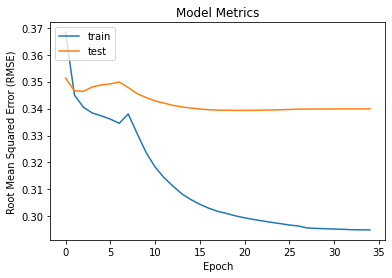

In [70]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()